### 1~3 각 개별 jupyter note에서 전처리 후, pickle 또는 csv저장.
1. 전국일방통행도로표준데이터
    - 시도명, 지정사유, 지정연도, 도로폭, 도로차로수, 보차분리여부
    
2. 전국어린이보호구역표준데이터 : *시도명 작업필요* (제공기관명에서 split)
    - 시설종류, 관할경찰서명, CCTV설치여부, CCTV설치대수, 제공기관명, 보호구역도로폭
   
3. 전국노인장애인보호구역표준데이터
    - 시도명, 제한속도, CCTV설치여부, CCTV설치대수, 보호구역도로폭
     
4. 새로운 jupyter note 에서 종합
    - 시도명, 어린이보호구역 CCTV설치대수, 노인장애인보호구역 CCTV설치대수, 일방통행 보차분리 ycount 

In [1]:
import numpy as np
import pandas as pd

pd_oneway = pd.read_csv('전국일방통행도로표준데이터_pass1.csv')
pd_child = pd.read_csv('전국어린이보호구역표준데이터_pass1.csv')
pd_elder = pd.read_csv('전국노인장애인보호구역표준데이터_pass1.csv')


In [8]:
#print(pd_oneway.head())     # 시도명 별 보차분리여부 y count
#print(pd_child.head())      # 시도명 별 CCTV설치대수 count
#print(pd_elder.head())      # 시도명 별 CCTV설치대수 count

In [2]:
g1 = pd_oneway[pd_oneway['보차분리여부'] == 'Y'].groupby('시도명')
s1 = g1['보차분리여부'].count()
s1.name = '일방통행보차분리Y_COUNT'
print(s1)

시도명
강원도         19
경기도        118
경상남도        51
경상북도        36
광주광역시       36
서울특별시       99
인천광역시       28
전라남도         7
전라북도        13
제주특별자치도     32
충청남도        52
충청북도        10
Name: 일방통행보차분리Y_COUNT, dtype: int64


In [3]:
g2 = pd_child.groupby('시도명')
s2 = g2['CCTV설치대수'].sum()
s2.name = '어린이CCTV_COUNT'
print(s2)

시도명
강원도        1327.0
경기도        6834.0
경상남도       3721.0
경상북도       2136.0
광주광역시       419.0
대구광역시      1168.0
대전광역시      1405.0
부산광역시      1493.0
서울특별시      3703.0
세종특별자치시      26.0
울산광역시       812.0
인천광역시       761.0
전라남도       2437.0
전라북도       1895.0
제주특별자치도     484.0
충청남도       1484.0
충청북도       1784.0
Name: 어린이CCTV_COUNT, dtype: float64


In [4]:
g3 = pd_elder.groupby('시도명')
s3 = g3['CCTV설치대수'].sum()
s3.name = '노인장애인CCTV_COUNT'
print(s3)

시도명
강원도          7.0
경기도        148.0
경상남도        18.0
경상북도        44.0
광주광역시        7.0
대구광역시       17.0
대전광역시       55.0
부산광역시       38.0
서울특별시      121.0
세종특별자치시      0.0
울산광역시        4.0
인천광역시       88.0
전라남도        14.0
전라북도        34.0
제주특별자치도      0.0
충청남도       106.0
충청북도        20.0
Name: 노인장애인CCTV_COUNT, dtype: float64


In [5]:
df_combined = pd.concat((s1, s2, s3), axis = 1)
print(df_combined)

         일방통행보차분리Y_COUNT  어린이CCTV_COUNT  노인장애인CCTV_COUNT
시도명                                                     
강원도                 19.0         1327.0              7.0
경기도                118.0         6834.0            148.0
경상남도                51.0         3721.0             18.0
경상북도                36.0         2136.0             44.0
광주광역시               36.0          419.0              7.0
서울특별시               99.0         3703.0            121.0
인천광역시               28.0          761.0             88.0
전라남도                 7.0         2437.0             14.0
전라북도                13.0         1895.0             34.0
제주특별자치도             32.0          484.0              0.0
충청남도                52.0         1484.0            106.0
충청북도                10.0         1784.0             20.0
대구광역시                NaN         1168.0             17.0
대전광역시                NaN         1405.0             55.0
부산광역시                NaN         1493.0             38.0
세종특별자치시              NaN       

C:\Users\eunbin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\eunbin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\eunbin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
C:\Users\eunbin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\eunbin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func

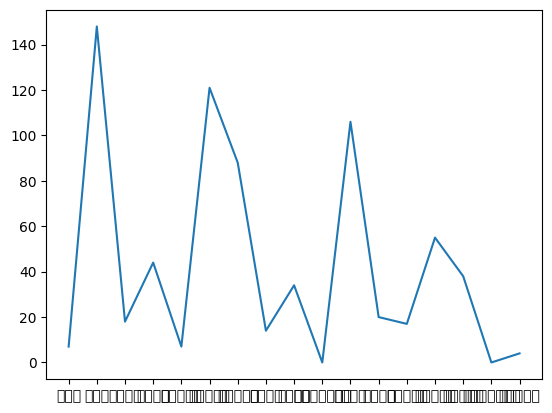

In [6]:
import matplotlib.pyplot as plt

_, axe = plt.subplots()
#axe.plot(df_combined['어린이CCTV_COUNT'])
axe.plot(df_combined['노인장애인CCTV_COUNT'])

In [7]:
np.corrcoef((df_combined['어린이CCTV_COUNT']), df_combined['노인장애인CCTV_COUNT'])

array([[1.        , 0.66061138],
       [0.66061138, 1.        ]])